In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("coronadata.csv")
data

C:\Users\kasir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.818200,8.227500,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.126400,33.429900,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.060800,-61.796400,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.109600,-77.297500,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.189900,-88.497600,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718075,Confirmed,NaN,0,0,1/22/2020,"Jones, Georgia, US",US,Georgia,Jones,US,USA,13169.0,33.025121,-83.560192,28735.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
718076,Deaths,NaN,0,0,1/22/2020,"Tulsa, Oklahoma, US",US,Oklahoma,Tulsa,US,USA,40143.0,36.119396,-95.940139,651552.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
718077,Deaths,NaN,0,0,1/22/2020,"Wood, Wisconsin, US",US,Wisconsin,Wood,US,USA,55141.0,44.455379,-90.041583,72999.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM
718078,Confirmed,NaN,0,0,1/22/2020,"Starke, Indiana, US",US,Indiana,Starke,US,USA,18149.0,41.278903,-86.646869,22995.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['trans_date'] = data['Date'].dt.strftime('%B - %Y')
data_pivot =  data.pivot_table(index = 'trans_date',aggfunc=sum,fill_value=0).T

In [4]:
data_pivot

trans_date,April - 2020,February - 2020,January - 2020,March - 2020,May - 2020
Cases,6.730666e+07,1.718437e+06,3.942300e+04,9.291138e+06,7.253237e+06
Difference,2.588200e+06,7.876800e+04,1.014000e+04,8.129470e+05,1.809410e+05
FIPS,5.727946e+09,5.537015e+09,1.909315e+09,5.918878e+09,3.818631e+08
Lat,7.607268e+06,7.353692e+06,2.535756e+06,7.860843e+06,5.071512e+05
Long,-1.707714e+07,-1.650790e+07,-5.692379e+06,-1.764638e+07,-1.138476e+06
People_Hospitalized_Cumulative_Count,4.314464e+06,0.000000e+00,0.000000e+00,0.000000e+00,4.912160e+05
People_Total_Tested_Count,1.661245e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.673631e+07
Population_Count,4.634211e+11,4.479737e+11,1.544737e+11,4.788684e+11,3.089474e+10


In [5]:
def confirm(x):
    if(x == 'Confirmed'):
        return "1"
    else:
        return "0"
data['Confirm'] = data['Case_Type'].apply(confirm)


def death(x):
    if(x == 'Deaths'):
        return "1"
    else:
        return "0"
data['dead'] = data['Case_Type'].apply(death)

In [ ]:
data.head()

In [6]:
len(data.Country_Region.unique())

186

In [7]:
data.groupby(['Country_Region','Case_Type']).sum()

People_Total_Tested_Count  Cases  Difference  FIPS  \
Country_Region Case_Type                                                       
Afghanistan    Confirmed                        0.0  33266        2469   0.0   
               Deaths                           0.0   1029          72   0.0   
Albania        Confirmed                        0.0  19435         789   0.0   
               Deaths                           0.0    881          31   0.0   
Algeria        Confirmed                        0.0  82774        4295   0.0   
...                                             ...    ...         ...   ...   
Yemen          Deaths                           0.0      6           2   0.0   
Zambia         Confirmed                        0.0   2176         119   0.0   
               Deaths                           0.0     68           3   0.0   
Zimbabwe       Confirmed                        0.0    745          34   0.0   
               Deaths                           0.0    103           4   0.0   

                                  Lat         Long  Population_Count  \
Country_Region Case_Type                                               
Afghanistan    Confirmed  3461.789220  6906.415206      3.970691e+09   
               Deaths     3461.789220  6906.415206      3.970691e+09   
Albania        Confirmed  4197.636600  2057.166600      2.935356e+08   
               Deaths     4197.636600  2057.166600      2.935356e+08   
Algeria        Confirmed  2859.457800   169.279200      4.472806e+09   
...                               ...          ...               ...   
Yemen          Deaths     1586.378154  4948.671576      3.042249e+09   
Zambia         Confirmed -1339.657494  2840.631864      1.875164e+09   
               Deaths    -1339.657494  2840.631864      1.875164e+09   
Zimbabwe       Confirmed -1939.574676  2973.795414      1.516019e+09   
               Deaths    -1939.574676  2973.795414      1.516019e+09   

                          People_Hospitalized_Cumulative_Count  
Country_Region Case_Type                                        
Afghanistan    Confirmed                                   0.0  
               Deaths                                      0.0  
Albania        Confirmed                                   0.0  
               Deaths                                      0.0  
Algeria        Confirmed                                   0.0  
...                                                        ...  
Yemen          Deaths                                      0.0  
Zambia         Confirmed                                   0.0  
               Deaths                                      0.0  
Zimbabwe       Confirmed                                   0.0  
               Deaths                                      0.0  

[372 rows x 8 columns]

Text(0.5, 32.09375, 'Column Names')

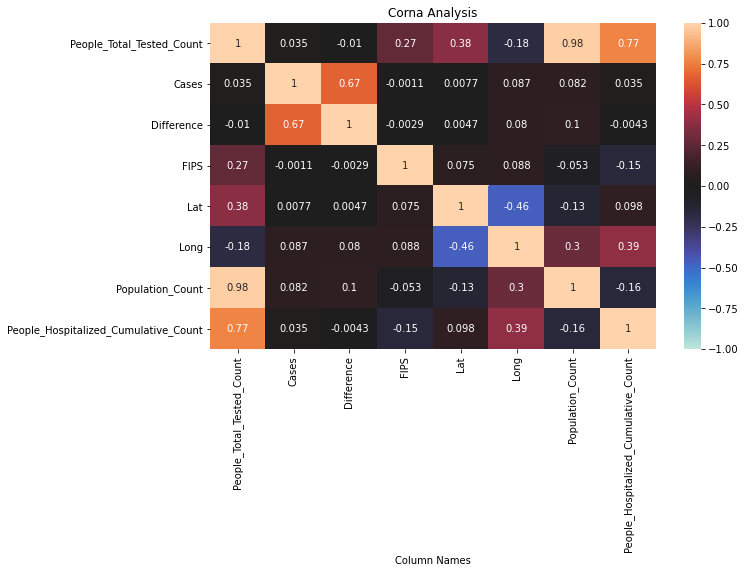

In [8]:
plt.figure(figsize = (10,6))
plt.title("Corna Analysis")
sns.heatmap(data.corr(),annot = True,vmin=-1,vmax=1,center=0)
plt.xlabel("Column Names")

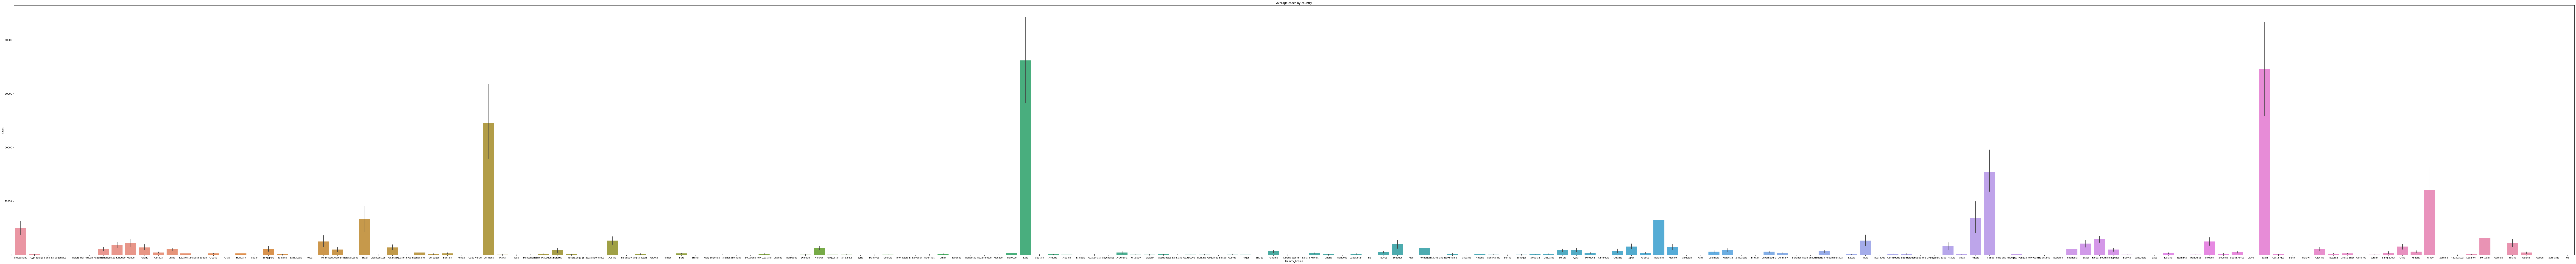

In [9]:
plt.figure(figsize = (200,20))
plt.title("Average cases by country")
sns.barplot(x = data['Country_Region'], y = data['Cases'])

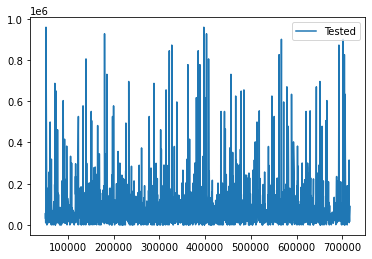

In [10]:
sns.lineplot(data = data['People_Total_Tested_Count'],label = 'Tested')

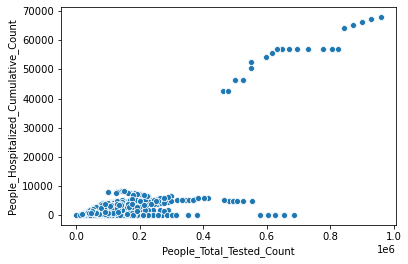

In [11]:
sns.scatterplot(x = data['People_Total_Tested_Count'],y = data['People_Hospitalized_Cumulative_Count'])

In [12]:
data

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,trans_date,Confirm,dead
0,Confirmed,NaN,0,0,2020-02-03,Switzerland,Switzerland,NaN,NaN,CH,...,NaN,46.818200,8.227500,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,February - 2020,1,0
1,Deaths,NaN,0,0,2020-03-01,Cyprus,Cyprus,NaN,NaN,CY,...,NaN,35.126400,33.429900,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,March - 2020,0,1
2,Confirmed,NaN,23,0,2020-04-21,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,...,NaN,17.060800,-61.796400,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,April - 2020,1,0
3,Deaths,NaN,0,0,2020-02-11,Jamaica,Jamaica,NaN,NaN,JM,...,NaN,18.109600,-77.297500,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,February - 2020,0,1
4,Confirmed,NaN,0,0,2020-02-06,Belize,Belize,NaN,NaN,BZ,...,NaN,17.189900,-88.497600,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,February - 2020,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718075,Confirmed,NaN,0,0,2020-01-22,"Jones, Georgia, US",US,Georgia,Jones,US,...,13169.0,33.025121,-83.560192,28735.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,January - 2020,1,0
718076,Deaths,NaN,0,0,2020-01-22,"Tulsa, Oklahoma, US",US,Oklahoma,Tulsa,US,...,40143.0,36.119396,-95.940139,651552.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,January - 2020,0,1
718077,Deaths,NaN,0,0,2020-01-22,"Wood, Wisconsin, US",US,Wisconsin,Wood,US,...,55141.0,44.455379,-90.041583,72999.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,January - 2020,0,1
718078,Confirmed,NaN,0,0,2020-01-22,"Starke, Indiana, US",US,Indiana,Starke,US,...,18149.0,41.278903,-86.646869,22995.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,January - 2020,1,0


In [14]:
datasort = data.sort_values(by='Country_Region',ascending=True)

In [17]:
datasort['Country_Region']

20873    Afghanistan
13499    Afghanistan
48263    Afghanistan
3131     Afghanistan
38632    Afghanistan
            ...     
32453       Zimbabwe
25912       Zimbabwe
14867       Zimbabwe
33143       Zimbabwe
8871        Zimbabwe
Name: Country_Region, Length: 718080, dtype: object

In [19]:
data['trans_date'] = data['Date'].dt.strftime('%B - %Y')

In [20]:
data_pivot =  data.pivot_table(index = 'trans_date',aggfunc=sum,fill_value=0).T

In [21]:
data_pivot

trans_date,April - 2020,February - 2020,January - 2020,March - 2020,May - 2020
Cases,6.730666e+07,1.718437e+06,3.942300e+04,9.291138e+06,7.253237e+06
Difference,2.588200e+06,7.876800e+04,1.014000e+04,8.129470e+05,1.809410e+05
FIPS,5.727946e+09,5.537015e+09,1.909315e+09,5.918878e+09,3.818631e+08
Lat,7.607268e+06,7.353692e+06,2.535756e+06,7.860843e+06,5.071512e+05
Long,-1.707714e+07,-1.650790e+07,-5.692379e+06,-1.764638e+07,-1.138476e+06
People_Hospitalized_Cumulative_Count,4.314464e+06,0.000000e+00,0.000000e+00,0.000000e+00,4.912160e+05
People_Total_Tested_Count,1.661245e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.673631e+07
Population_Count,4.634211e+11,4.479737e+11,1.544737e+11,4.788684e+11,3.089474e+10


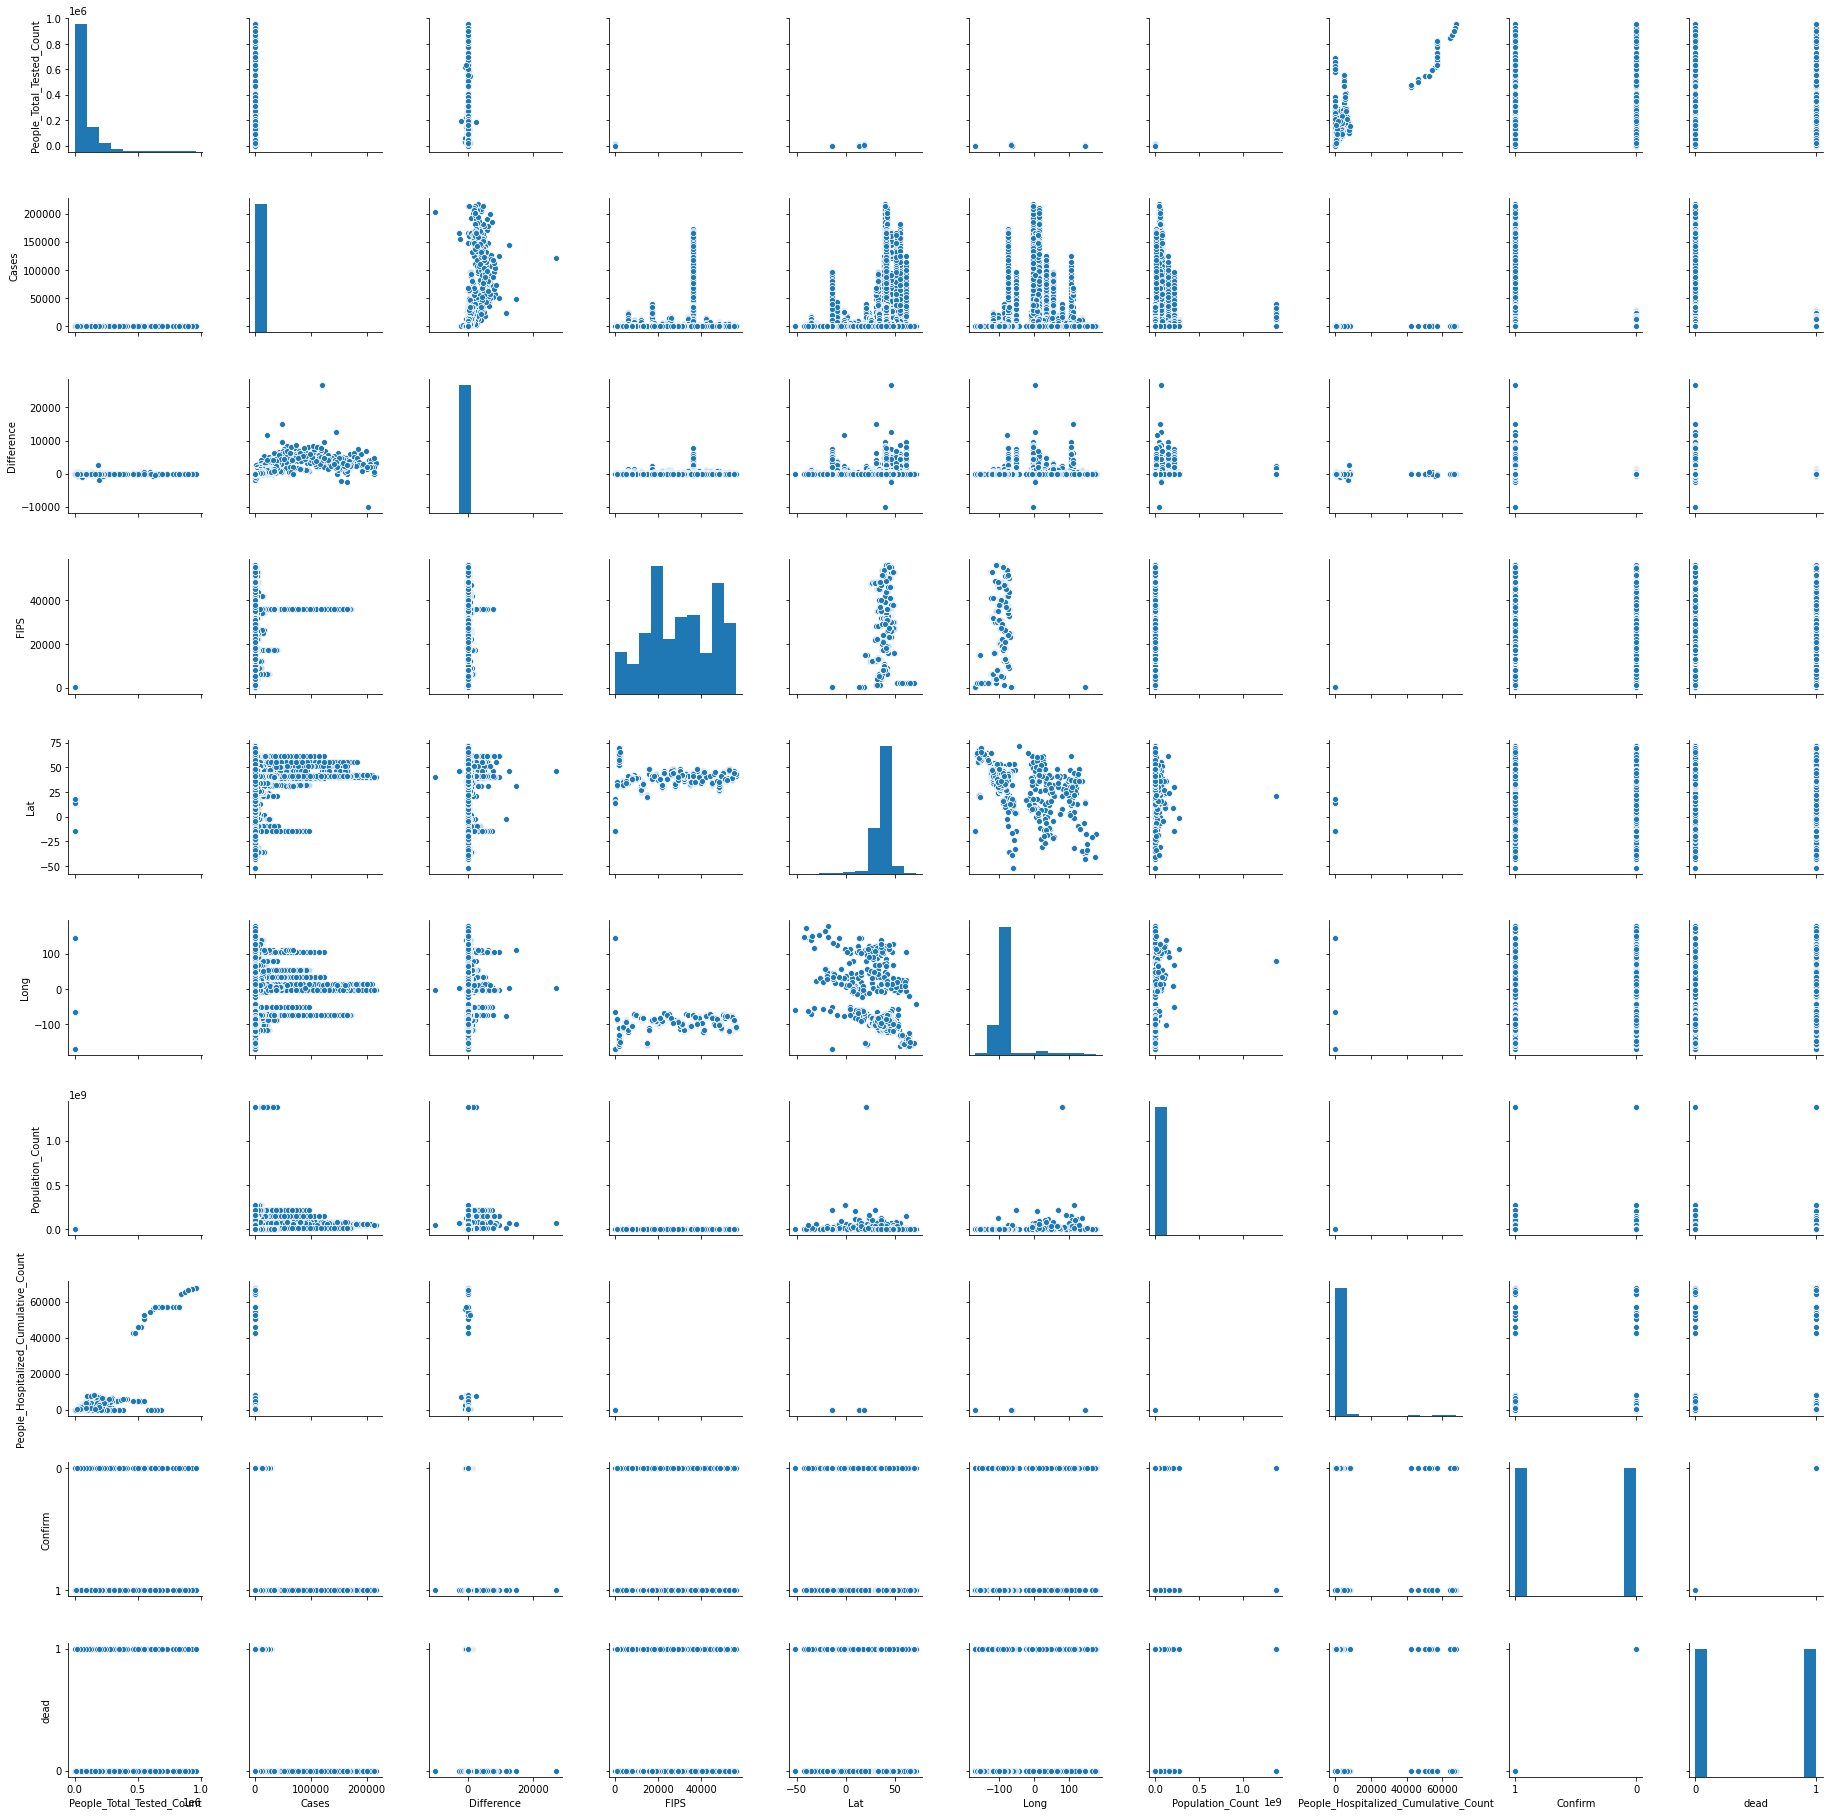

In [24]:
sns.pairplot(data)